In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check data
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


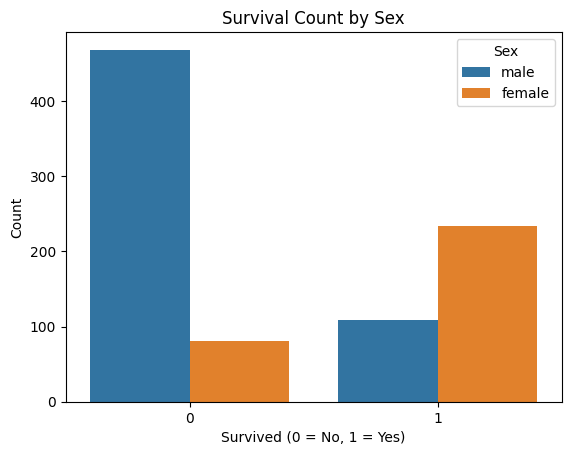

In [93]:
#Survival Rate by Sex
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


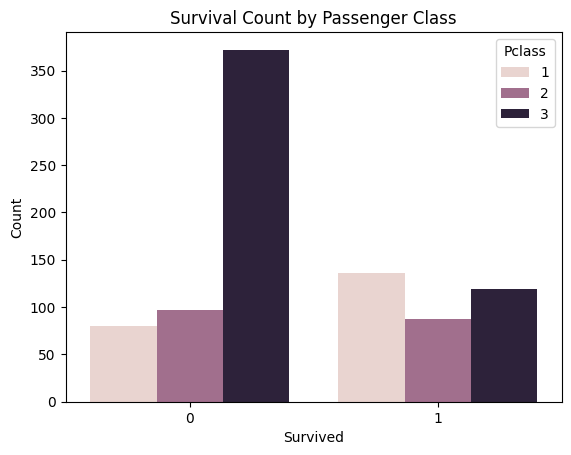

In [94]:
#Survival Rate by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

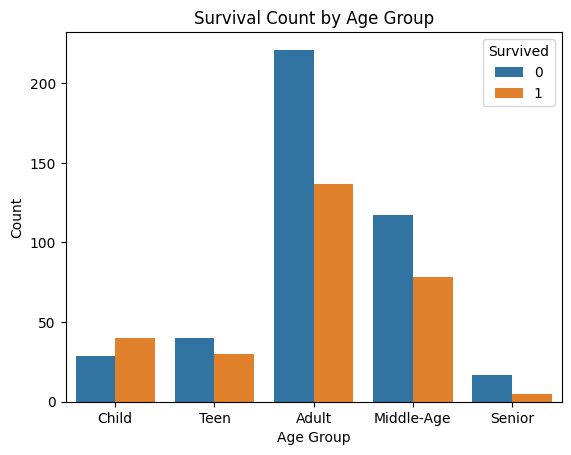

In [95]:
#Survival Rate by Age Group
# Add age bins
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                              labels=['Child', 'Teen', 'Adult', 'Middle-Age', 'Senior'])

sns.countplot(x='AgeGroup', hue='Survived', data=train_df)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

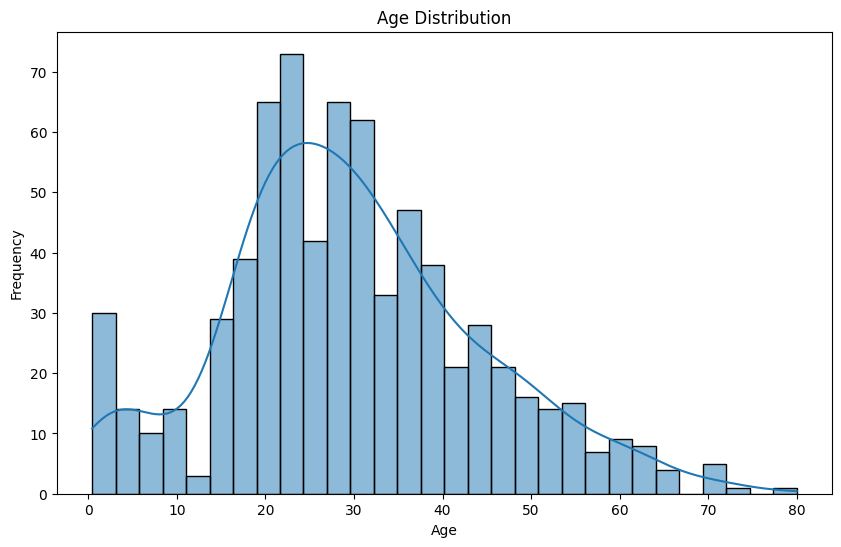

In [96]:
#Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

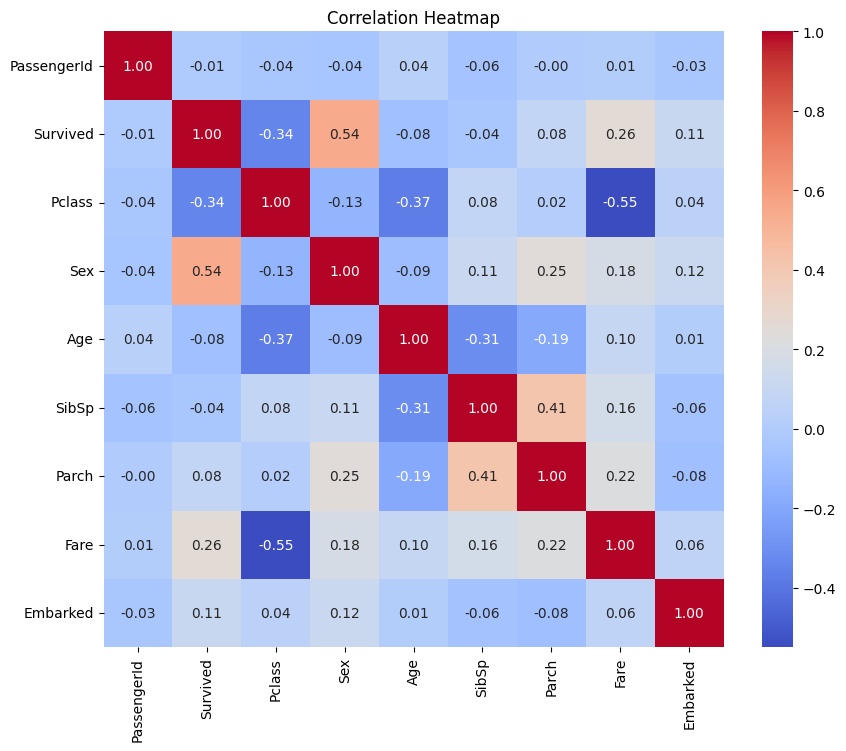

In [97]:
#Correlation Heatmap
corr_df = train_df.copy() # Copy to avoid changing original

# Encode categorical data
corr_df['Sex'] = corr_df['Sex'].map({'male': 0, 'female': 1})
corr_df['Embarked'] = corr_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Compute correlation
corr = corr_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


A correlation heatmap shows how strongly different numeric features are related to each other, especially to the target variable (Survived).

Values range from -1 to 1:

+1 = strong positive correlation (both increase together)

-1 = strong negative correlation (one increases, the other decreases)

0 = no correlation

 Focus: Correlation with Survived
1-Strongest positive correlation:
Sex (0.54)
-Most important finding: Being female (encoded as 1) strongly correlates with survival.
-This confirms that women had higher survival rates, which aligns with historical facts ("women and children first").

2- Moderate positive correlation:
Fare (0.26)
-Passengers who paid more for their ticket were slightly more likely to survive.
-Likely because higher fares are linked with 1st class (better access to lifeboats).

Parch (0.08) and Embarked (0.11)
-Weak correlations; might not be very useful alone.

3-Strongest negative correlation:
Pclass (-0.34)
-Lower class (higher number: 3rd class = 3) is associated with lower survival.
-So, 1st class (Pclass = 1) passengers had a better survival chance.

Age (-0.08)
-Weak negative correlation, suggesting younger people survived slightly more, but it’s not very strong.

In [98]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [99]:
#Handle missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())



In [100]:
#drop cabin 
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle-Age
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [ ]:
# Fill Embarked 
#the mode fills in missing values with the most typical category
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])



In [102]:
#fill fare in test data
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


In [103]:
# Encode categorical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [104]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Middle-Age
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,Adult


In [105]:
#Extract the word between the comma and dot = the title
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)




In [106]:
# Simplify titles
for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col',
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [107]:
# Encode Title
title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
train_df['Title'] = train_df['Title'].map(title_map)
test_df['Title'] = test_df['Title'].map(title_map)


In [108]:
#dropped The Ticket values are often weird combinations of letters and numbers. They don’t have clear meaning
#  Drop from training data
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Drop from test data 
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)



In [109]:
#transformed categorical strings into numerical features.
train_df = pd.get_dummies(train_df, columns=["AgeGroup"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle-Age,AgeGroup_Senior
0,1,0,3,0,22.0,1,0,7.2500,0,0,False,False,True,False,False
1,2,1,1,1,38.0,1,0,71.2833,1,2,False,False,False,True,False
2,3,1,3,1,26.0,0,0,7.9250,0,1,False,False,True,False,False
3,4,1,1,1,35.0,1,0,53.1000,0,2,False,False,True,False,False
4,5,0,3,0,35.0,0,0,8.0500,0,0,False,False,True,False,False


In [110]:
train_df= train_df.astype(int, errors='ignore')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle-Age,AgeGroup_Senior
0,1,0,3,0,22,1,0,7,0,0,0,0,1,0,0
1,2,1,1,1,38,1,0,71,1,2,0,0,0,1,0
2,3,1,3,1,26,0,0,7,0,1,0,0,1,0,0
3,4,1,1,1,35,1,0,53,0,2,0,0,1,0,0
4,5,0,3,0,35,0,0,8,0,0,0,0,1,0,0


In [111]:
#Split training data
from sklearn.model_selection import train_test_split
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
#Try a model ( Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [113]:
# Perform 5-fold cross-validation on the training set (X,Y) before split
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.69273743 0.80337079 0.82022472 0.79213483 0.84269663]
Average accuracy: 0.7902328792919466


🔹 Random Forest Classifier 🔹
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



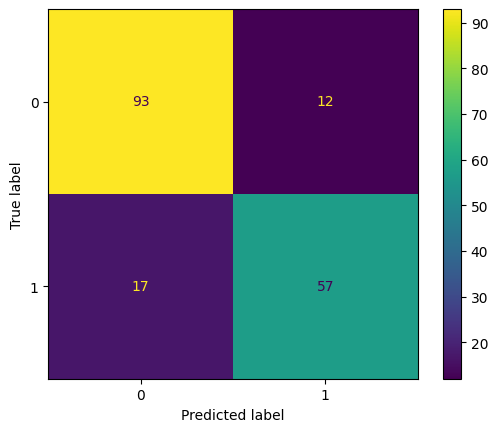

In [114]:
#Train and predict using the hold-out validation set
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print("🔹 Random Forest Classifier 🔹")
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)


🔹 Logistic Regression Results 🔹
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



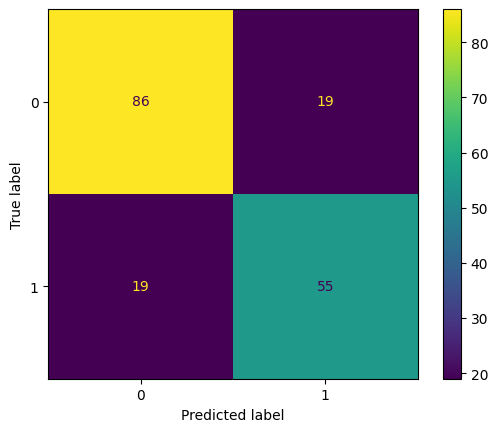

In [115]:
# Try model LogisticRegression
from sklearn.linear_model import LogisticRegression


# 1. Create and train the logistic regression model
log_model = LogisticRegression(max_iter=2000)  
log_model.fit(X_train, y_train)

# 2. Predict on validation set
y_pred_log = log_model.predict(X_val)

# 3. Evaluation
print("🔹 Logistic Regression Results 🔹")
print(classification_report(y_val, y_pred_log))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_log)


In [116]:
#compare the accuracy between 'Logistic Regression' and 'Random Forest'
from sklearn.metrics import accuracy_score
print("Accuracy Comparison:")
print("Logistic Regression:", accuracy_score(y_val, y_pred_log))
print("Random Forest:      ", accuracy_score(y_val, y_pred))


Accuracy Comparison:
Logistic Regression: 0.7877094972067039
Random Forest:       0.8379888268156425


In [117]:
from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 5, 10],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10]       # Minimum samples to split a node
}

# Create base model
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit it
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_rf.predict(X_val)

from sklearn.metrics import classification_report
print("🔍 Tuned Random Forest:")
print(classification_report(y_val, y_pred_best))


🔍 Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

